<a href="https://colab.research.google.com/github/souravskr/ducspond_ai/blob/SVHN_CNN/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive


In [44]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data = loadmat('drive/My Drive/Colab Notebooks/train_32x32.mat')
test_data = loadmat ('drive/My Drive/Colab Notebooks/test_32x32.mat')

In [0]:
# Splitting train and test data into X and y
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
X_train, X_test = X_train / 255.0, X_test / 255.0

In [75]:
y_test.shape

(26032, 1)

In [0]:
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

In [77]:
y_test.shape

(26032,)

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [79]:
y_test.shape

(26032,)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)


In [0]:

X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 0.2, random_state = 0)

In [0]:
model = Sequential()
model.add(Convolution2D(64,[5,5],data_format='channels_last',activation='relu',input_shape =(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))

model.add (Convolution2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))



model.add(Flatten())
model.add(Dense(100))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
activation_13 (Activation)   (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               160100    
__________

In [84]:
model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size = 200, epochs= 10)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 8s 145us/step - loss: 1.3418 - acc: 0.5579 - val_loss: 0.9836 - val_acc: 0.7000
Epoch 2/10
58605/58605 [==============================] - 8s 129us/step - loss: 0.5805 - acc: 0.8358 - val_loss: 1.0451 - val_acc: 0.6711
Epoch 3/10
58605/58605 [==============================] - 8s 129us/step - loss: 0.4823 - acc: 0.8645 - val_loss: 0.8393 - val_acc: 0.7449
Epoch 4/10
58605/58605 [==============================] - 8s 129us/step - loss: 0.4283 - acc: 0.8789 - val_loss: 0.6164 - val_acc: 0.8292
Epoch 5/10
58605/58605 [==============================] - 8s 133us/step - loss: 0.3906 - acc: 0.8882 - val_loss: 0.8000 - val_acc: 0.7557
Epoch 6/10
58605/58605 [==============================] - 9s 156us/step - loss: 0.3616 - acc: 0.8965 - val_loss: 0.5279 - val_acc: 0.8479
Epoch 7/10
58605/58605 [==============================] - 9s 160us/step - loss: 0.3384 - acc: 0.9033 - val_loss: 0.6652 - 

In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [86]:
y_test.shape

(26032, 10)

In [87]:
val_loss, val_acc = model.evaluate (X_test, y_test)

26032/26032 [==============================] - 5s 180us/step


In [88]:
print(val_loss)

0.4381251046096319


In [89]:
print(val_acc)

0.8824523663183774


In [0]:
predictions = model.predict(X_test)

In [100]:
predictions[0]

array([7.6670915e-07, 3.4585901e-06, 3.9378865e-05, 1.7262159e-02,
       2.1173850e-05, 9.7339737e-01, 3.3736089e-03, 5.3160437e-03,
       1.2489445e-04, 4.6119664e-04], dtype=float32)

In [110]:
np.argmax(predictions[5])

1

In [111]:
np.argmax(y_test[5])

1

In [0]:
plt.imshow(X_test[0])

In [0]:
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

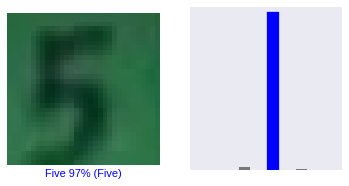

In [124]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

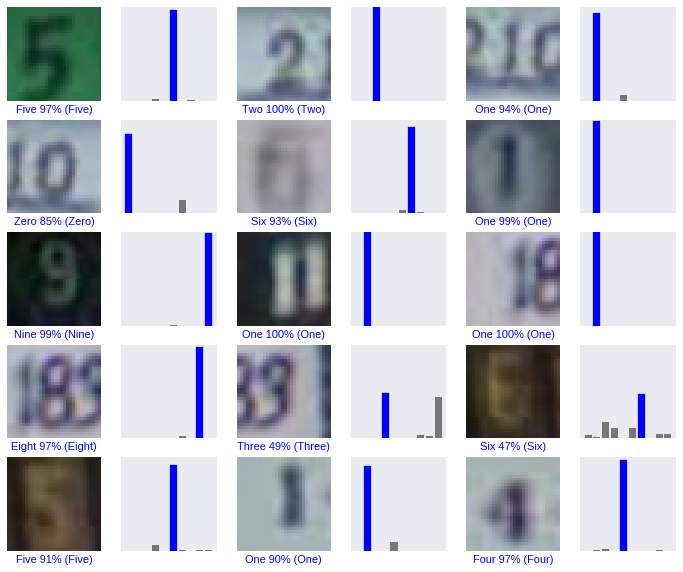

In [125]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  y_test)
plt.show()


In [0]:
model.save('SVHN_CNN_64*2.h5')